# Кластеризация. Метод K-Means. Домашнее задание

## Задача

Пусть имеется набор данных `Mall_Customers.csv` о покупателях супермаркета:

* CustomerID — идентификатор покупателя;
* Genre — пол;
* Age — возраст;
* Annual Income (k$) — годовой доход покупателя в тыс. долл.;
* Spending Score (1–100) — рейтинг трат покупателя.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы.

### Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других обнаруженных свойствах данных.

In [21]:
import pandas as pd
import numpy as np

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [23]:
df.isna().sum() 

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Поскольку данных может быть настолько много, что построение одной модели будет занимать несколько часов, важно примерно оценить количество кластеров до запуска обучения модели.

На основе результатов разведочного анализа данных предположите, какое количество кластеров будет оптимальным, и аргументируйте предположение.

In [24]:
# На основе анализа признаков Age, Annual Income и Spending Score можно предположить, что данные разбиваются на несколько чётких групп по уровню дохода и трат.
# Визуально в подобных наборах обычно выделяется от 4 до 6 кластеров.
# Наиболее вероятное оптимальное количество кластеров — 5, так как клиенты разделяются на группы по возрасту, доходу и стилю потребления (низкие/высокие доходы и низкие/высокие траты).

### Задание 3

Преобразуйте категориальный признак Genre в численный.

In [25]:
df["Genre"] = df["Genre"].map({"Male": 0, "Female": 1})

### Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя.

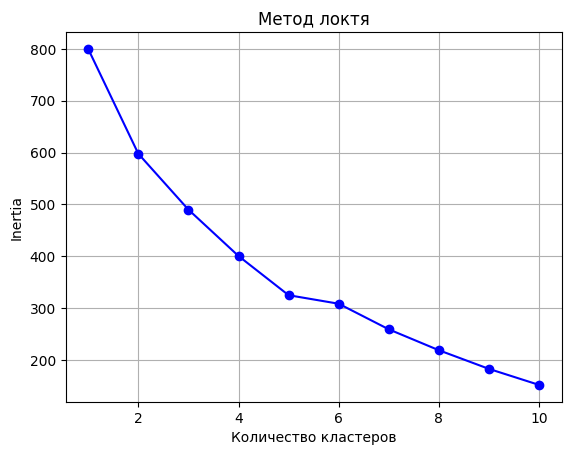

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Удаляем ID, он не нужен
X = df.drop("CustomerID", axis=1)

# Масштабируем — очень важно для KMeans!
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Метод локтя
inertia = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, "bo-")
plt.xlabel("Количество кластеров")
plt.ylabel("Inertia")
plt.title("Метод локтя")
plt.grid(True)
plt.show()


### Задание 5

Постройте финальную модель кластеризации с количеством кластеров, опредёленным в предыдущем задании.

In [27]:
k_optimal = 5

kmeans_final = KMeans(n_clusters=k_optimal, random_state=1)
clusters = kmeans_final.fit_predict(X_scaled)

df["Cluster"] = clusters
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,3
1,2,0,21,15,81,3
2,3,1,20,16,6,2
3,4,1,23,16,77,0
4,5,1,31,17,40,2


# Кластеризация. DBSCAN

Имеется некоторый набор данных `gt_2015.csv` о производительности и других параметрах ветряных электростанций:
* AT — температура окружающей среды.
* PT — давление окружающей среды.
* AH — влажность окружающей среды.
* AFDP — перепад давления на воздушном фильтре.
* GTEP — давление на выходе из газовой турбины.
* TIT — температура на входе в турбину.
* TAT — температура на выходе из турбины.
* TEY — энергоотдача турбины.
* CDP — давление нагнетания компрессора.
* CO — выбросы угарного газа.
* NOX — выбросы оксидов азота.

Решите задачу кластеризации электростанций для дальнейшего совместного управления схожими электростанциями.

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [28]:
df2 = pd.read_csv("gt_2015.csv")
df2.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7384 non-null   float64
 1   AP      7384 non-null   float64
 2   AH      7384 non-null   float64
 3   AFDP    7384 non-null   float64
 4   GTEP    7384 non-null   float64
 5   TIT     7384 non-null   float64
 6   TAT     7384 non-null   float64
 7   TEY     7384 non-null   float64
 8   CDP     7384 non-null   float64
 9   CO      7384 non-null   float64
 10  NOX     7384 non-null   float64
dtypes: float64(11)
memory usage: 634.7 KB


In [30]:
df2.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

# Задание 2

Предположите по результатам разведочного анализа данных, какие группы электростанций существуют, чем они отличаются, каково их количество.

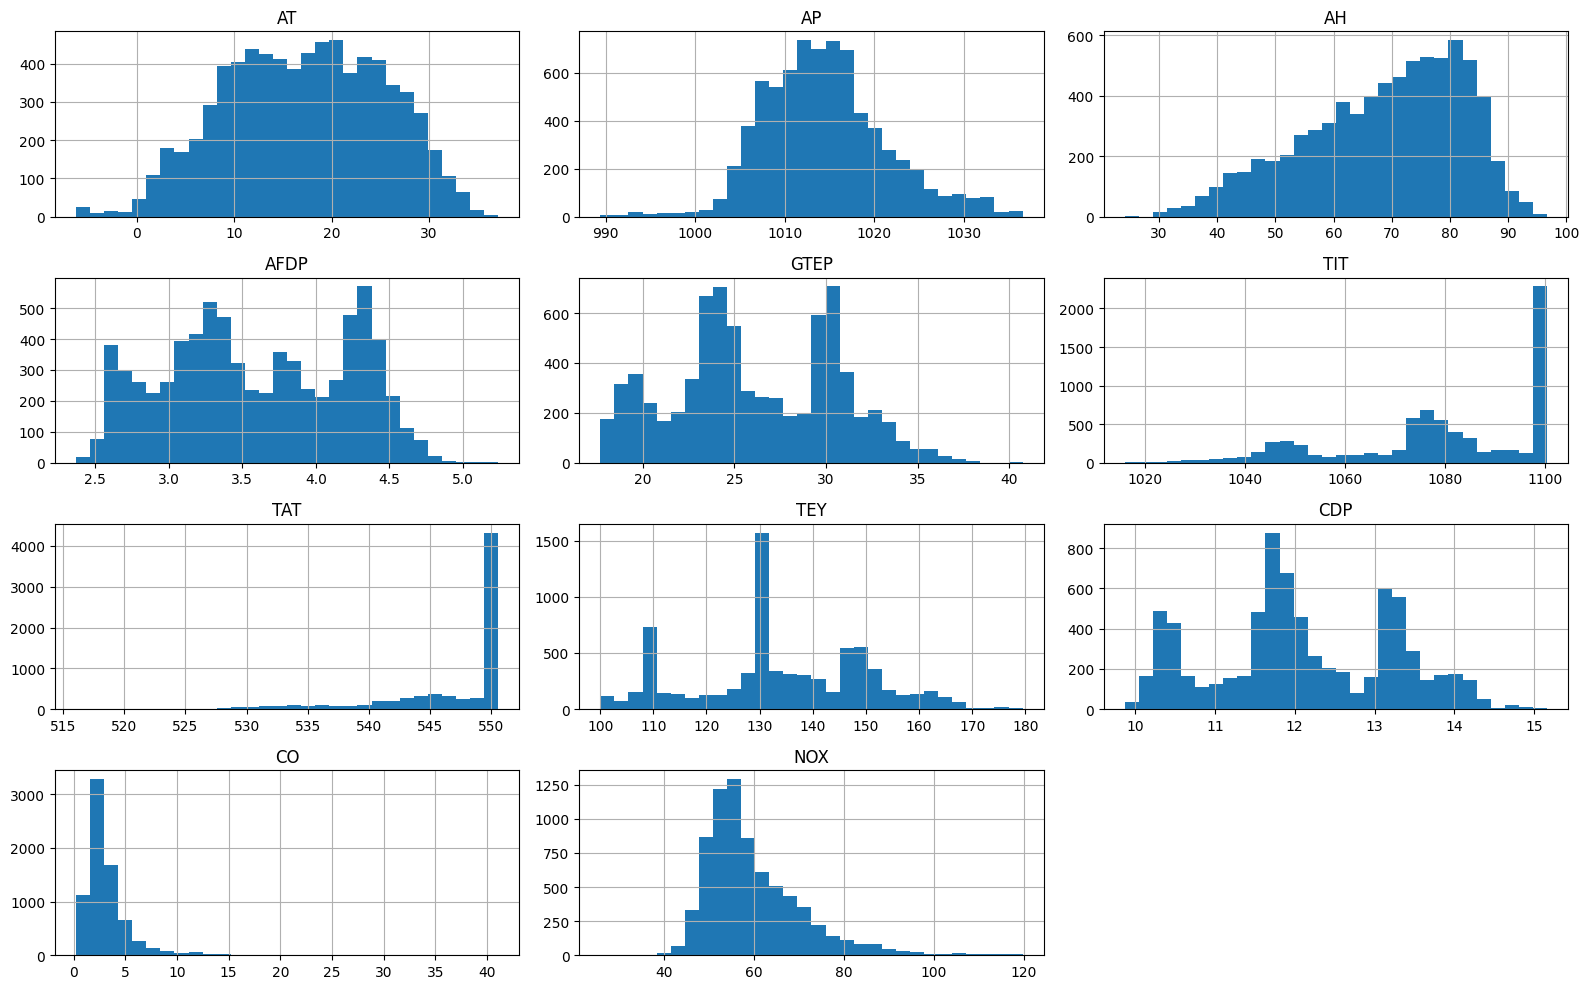

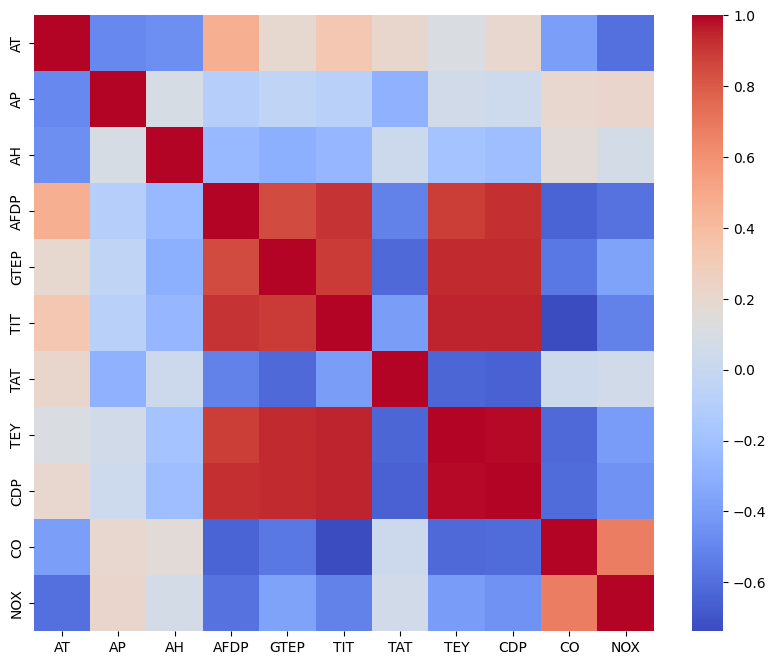

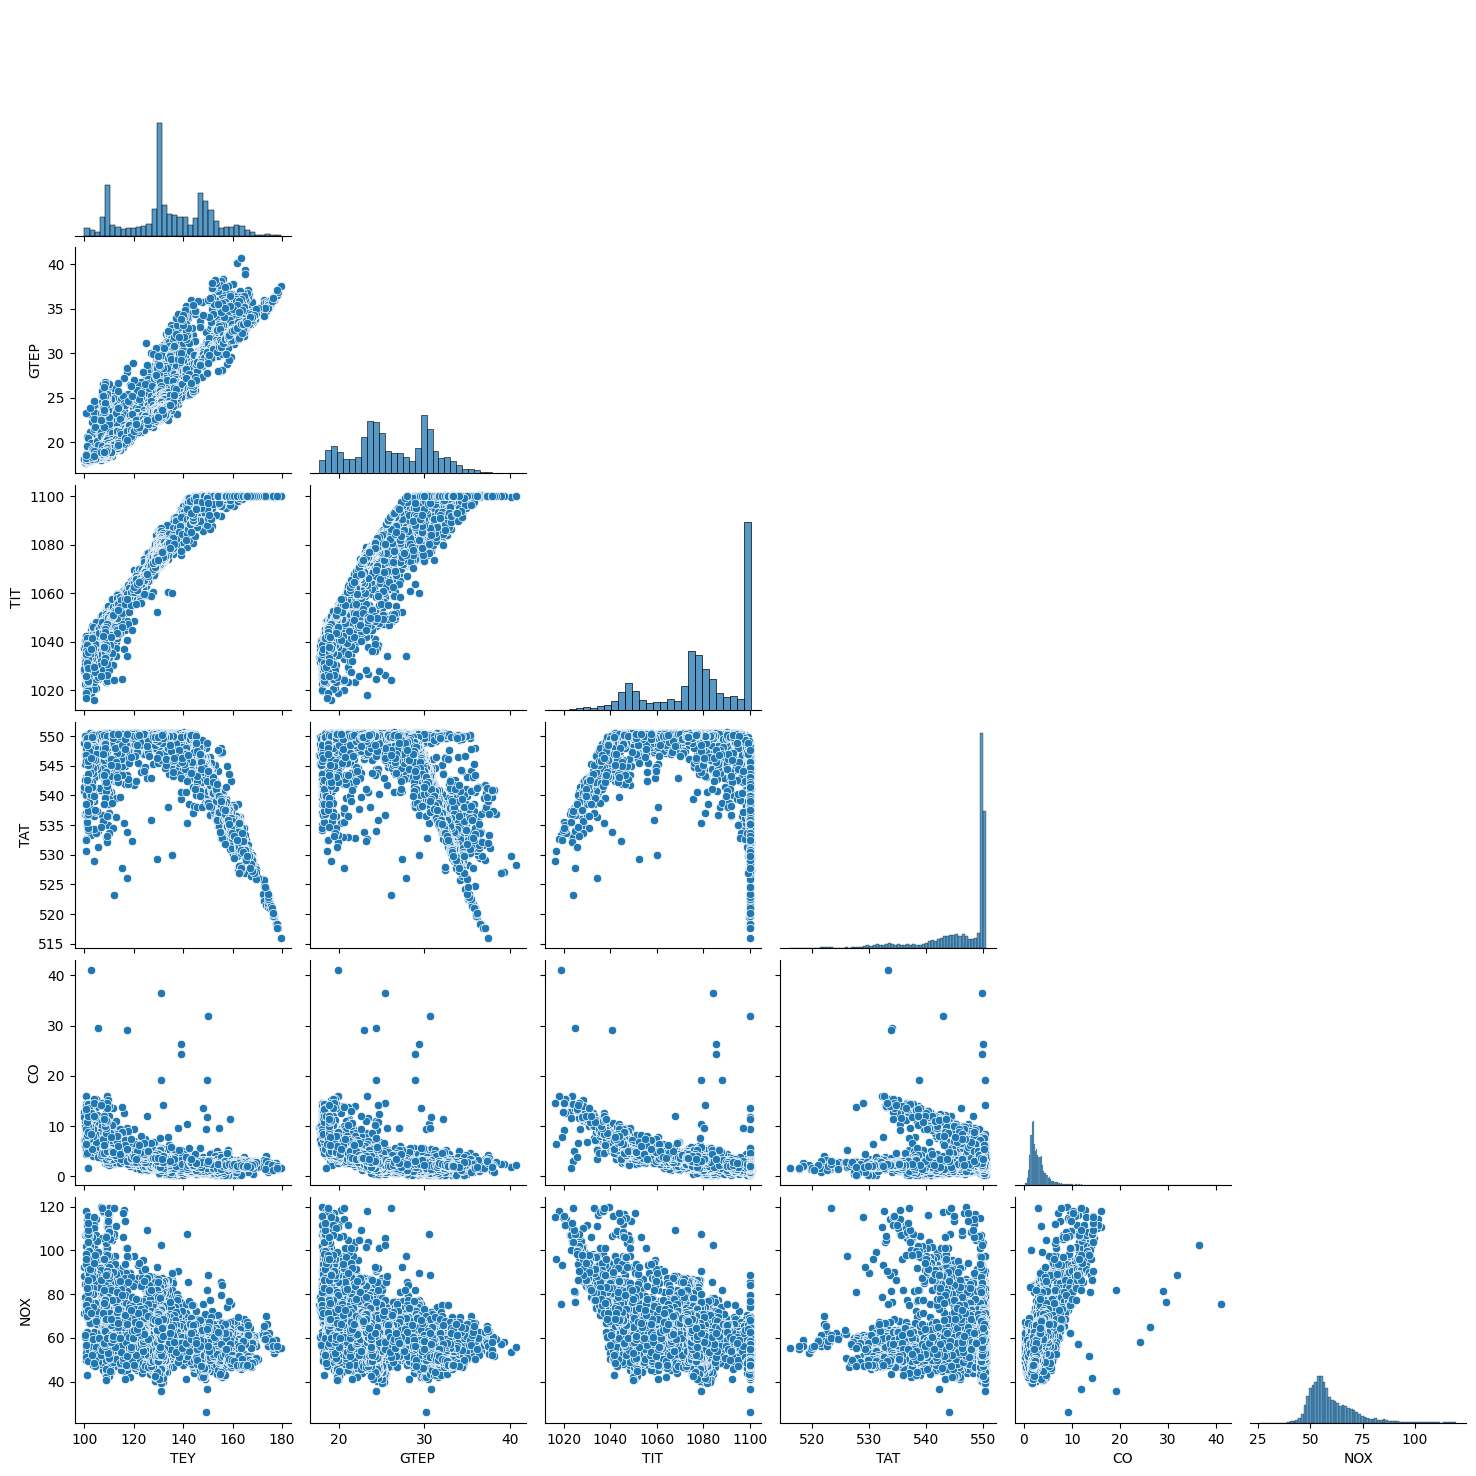

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

df2.describe()  # общая стата

# распределения признаков
df2.hist(bins=30, figsize=(16, 10))
plt.tight_layout()
plt.show()

# матрица корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=False, cmap="coolwarm")
plt.show()

# пару ключевых scatter-пар
sns.pairplot(df2[["TEY", "GTEP", "TIT", "TAT", "CO", "NOX"]], corner=True)
plt.show()


# Задание 3

Постройте модель кластеризации DBSCAN. Подберите оптимальные гиперпараметры, руководствуясь как результатами сеточного поиска, так и результатами анализа данных в предыдущих заданиях.

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

X = df2.values  # все признаки

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
eps_values = [0.3, 0.5, 0.7, 1.0, 1.5]
min_samples_values = [3, 5, 10]

results = []

for eps in eps_values:
    for ms in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=ms)
        labels = db.fit_predict(X_scaled)
        
        # количество кластеров (без шума)
        unique_labels = set(labels)
        n_clusters = len([l for l in unique_labels if l != -1])
        n_noise = list(labels).count(-1)
        noise_ratio = n_noise / len(labels)
        
        # silhouette считаем только если >=2 кластера
        if n_clusters >= 2:
            sil = silhouette_score(X_scaled[labels != -1], labels[labels != -1])
        else:
            sil = np.nan
        
        results.append((eps, ms, n_clusters, noise_ratio, sil))
        print(f"eps={eps}, min_samples={ms} -> clusters={n_clusters}, noise={noise_ratio:.2f}, silhouette={sil:.3f}")


eps=0.3, min_samples=3 -> clusters=420, noise=0.61, silhouette=0.295
eps=0.3, min_samples=5 -> clusters=138, noise=0.80, silhouette=0.422
eps=0.3, min_samples=10 -> clusters=13, noise=0.97, silhouette=0.567
eps=0.5, min_samples=3 -> clusters=229, noise=0.21, silhouette=-0.200
eps=0.5, min_samples=5 -> clusters=122, noise=0.32, silhouette=-0.154
eps=0.5, min_samples=10 -> clusters=35, noise=0.50, silhouette=-0.079
eps=0.7, min_samples=3 -> clusters=80, noise=0.08, silhouette=-0.428
eps=0.7, min_samples=5 -> clusters=48, noise=0.12, silhouette=-0.372
eps=0.7, min_samples=10 -> clusters=21, noise=0.21, silhouette=-0.251
eps=1.0, min_samples=3 -> clusters=22, noise=0.02, silhouette=-0.225
eps=1.0, min_samples=5 -> clusters=13, noise=0.03, silhouette=-0.237
eps=1.0, min_samples=10 -> clusters=9, noise=0.05, silhouette=-0.152
eps=1.5, min_samples=3 -> clusters=4, noise=0.01, silhouette=0.086
eps=1.5, min_samples=5 -> clusters=3, noise=0.01, silhouette=0.106
eps=1.5, min_samples=10 -> cluster

In [36]:
best_eps = 0.7
best_min_samples = 5

In [37]:
db_final = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_final = db_final.fit_predict(X_scaled)

df2["cluster"] = labels_final

df2["cluster"].value_counts()

cluster
 0     5699
-1      910
 1      269
 9       39
 39      30
 8       28
 31      26
 47      23
 6       22
 17      22
 23      17
 36      17
 16      15
 43      13
 2       13
 3       12
 19      12
 41      12
 40      11
 42      11
 34      10
 30      10
 20       9
 45       9
 24       8
 44       8
 35       8
 46       7
 5        7
 10       6
 11       6
 4        6
 18       6
 33       6
 37       6
 32       6
 7        5
 13       5
 12       5
 15       5
 22       5
 28       5
 29       5
 26       5
 27       5
 25       5
 14       5
 21       5
 38       5
Name: count, dtype: int64

# Задание 4

Интерпретируйте результаты кластеризации: объясните, чем схожи электростанции в каждом кластере и чем аномальные электростанции отличаются от остальных.

In [39]:
# средние значения по кластерам
cluster_profile = df2.groupby("cluster").mean()
cluster_profile.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
cluster,,,,,,,,,,,
-1,13.326089,1015.933484,68.087091,3.314083,25.172390,1066.990659,544.677275,127.512374,11.666180,5.136514,69.813547
0,18.679701,1013.850218,68.763766,3.650324,26.044870,1081.161835,547.762664,134.387610,12.123001,2.667243,57.688912
1,7.064050,1020.076580,74.146450,4.111423,33.751401,1099.927881,533.286171,162.512342,14.006223,2.689403,59.005480
2,1.491165,1017.607692,72.871000,2.639538,20.542769,1054.938462,549.816154,115.739231,10.713154,4.762931,84.811308
3,3.571308,1010.933333,60.047833,3.960258,32.823250,1099.925000,532.809167,164.657500,14.048417,2.807542,65.101083


In [40]:
anomalies = df2[df2["cluster"] == -1]
normal = df2[df2["cluster"] != -1]

print("Число аномалий:", len(anomalies))
anomalies.describe()

Число аномалий: 910


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,cluster
count,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.0
mean,13.326089,1015.933484,68.087091,3.314083,25.172390,1066.990659,544.677275,127.512374,11.666180,5.136514,69.813547,-1.0
std,7.380138,8.497137,14.239767,0.639463,5.405723,24.491509,6.063521,18.856894,1.281439,4.146740,16.874006,0.0
min,-5.979300,989.800000,24.085000,2.368800,17.761000,1016.000000,518.300000,100.040000,9.935800,0.212800,25.905000,-1.0
25%,8.521050,1010.025000,58.734250,2.738125,20.466500,1045.425000,540.960000,110.007500,10.489250,2.400200,58.142750,-1.0
50%,13.292500,1015.650000,70.289500,3.191250,24.390000,1065.200000,546.670000,122.965000,11.333500,4.010200,65.115000,-1.0
75%,17.866500,1021.200000,78.889750,3.846450,29.324000,1090.025000,549.840000,143.195000,12.727750,6.755975,80.298000,-1.0
max,37.103000,1035.700000,96.198000,4.953400,40.716000,1100.400000,550.510000,177.490000,15.039000,41.097000,119.680000,-1.0


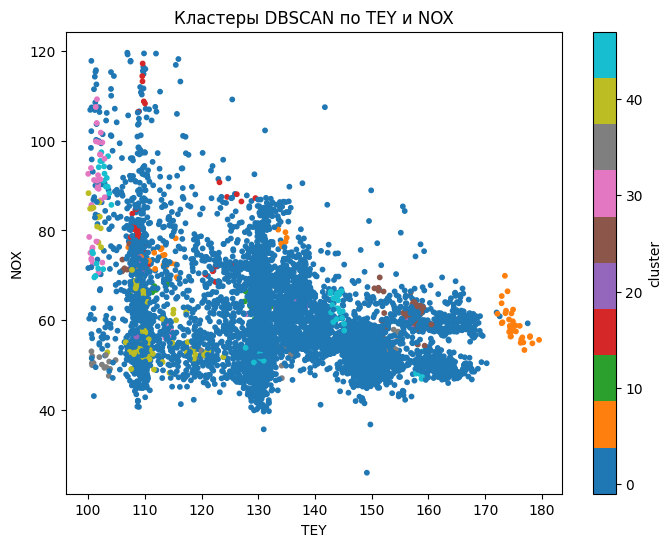

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(df2["TEY"], df2["NOX"], c=df2["cluster"], cmap="tab10", s=10)
plt.xlabel("TEY")
plt.ylabel("NOX")
plt.title("Кластеры DBSCAN по TEY и NOX")
plt.colorbar(scatter, label="cluster")
plt.show()

В результате кластеризации методом DBSCAN были выделены несколько кластеров, соответствующих различным режимам работы электростанций.

Один из кластеров характеризуется средними значениями TEY, GTEP, TIT и TAT — это станции, работающие в нормальном/номинальном режиме.

Другой кластер имеет повышенную энергоотдачу (TEY) и температуры (TIT, TAT), а также часто более высокие выбросы NOX — вероятно, станции, работающие с повышенной нагрузкой.

Ещё один кластер может соответствовать станциям с пониженной эффективностью — TEY ниже среднего при сопоставимых входных параметрах (AT, AP, AH, GTEP).

Объекты, отнесённые DBSCAN к кластеру -1, являются аномальными: у них могут быть:

экстремальные значения выбросов CO или NOX,

слишком низкая или слишком высокая TEY,

необычные комбинации температур и давлений.

Эти станции потенциально требуют дополнительного внимания: это либо нештатные режимы работы, либо ошибки измерений, либо уникальные условия эксплуатации, отличающиеся от основной массы станций.